In [2]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Elon_musk.csv', encoding="Latin")
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
df['tweets'] = df['Text']

In [5]:
stop_words = set(stopwords.words('english'))
df['tweets'] = df['tweets'].apply(lambda x: re.sub(r'\b(?:' + '|'.join(stop_words) + r')\b\s*', '', x))
df['tweets'] = df['tweets'].str.replace('|', ' ')

In [6]:
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [7]:
word_counts = Counter(" ".join(df['tweets']).split())
word_df = pd.DataFrame(list(word_counts.items()), columns=['Word', 'Count'])

In [8]:
# VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()
df['polarity'] = df['tweets'].apply(lambda x: sia.polarity_scores(x)['compound'])

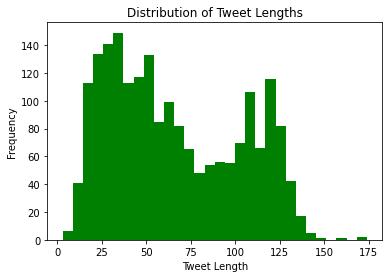

In [9]:
# Visualize the length of all tweets
df['tweet_length'] = df['tweets'].apply(len)
plt.hist(df['tweet_length'], bins=30, color='green')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Cleaning the input tweets
df['tweets'] = df['tweets'].str.lower()
df['tweets'] = df['tweets'].str.replace('[{}]'.format(string.punctuation), '')
df['tweets'] = df['tweets'].str.replace('\d+', '')

In [11]:
# Remove stopwords
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [12]:
# User-defined function to clean tweets
def clean_tweet(tweet):
    tweet = re.sub(r'[^\w\s]', '', tweet)  # Remove special characters
    tweet = re.sub(r'\s+', ' ', tweet).strip()  # Remove extra whitespaces
    return tweet

df['tweets'] = df['tweets'].apply(clean_tweet)

In [13]:
# User-defined function to remove emojis
def remove_emojis(tweet):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251" 
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['tweets'] = df['tweets'].apply(remove_emojis)

In [14]:
# Importing CountVectorizer to create a bag of words model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['tweets'])
bag_of_words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [15]:
# Creating TF-IDF vectorizer model
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['tweets'])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [16]:
# Print the frequency of the first 20 words in the Elon Musk tweets
print(word_df.sort_values(by='Count', ascending=False).head(20))

                  Word  Count
130              &amp;    218
210    @Erdayastronaut    140
260            @SpaceX    138
99                  RT    127
678          @PPathole    123
41            @flcnhvy    114
19               Tesla     85
100           @SpaceX:     71
720     @WholeMarsBlog     68
172             @Tesla     64
550     @teslaownersSV     62
319         @Teslarati     56
38                   .     56
347   @NASASpaceflight     54
116                Yes     50
864     @cleantechnica     39
1043              like     37
36               would     37
105             launch     35
297     @Kristennetten     35


In [17]:
# Calculate polarity score of tweets
df['polarity'] = df['tweets'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [18]:
# Display top 5 positive posts of Category_A
positive_tweets = df[df['polarity'] > 0].sort_values(by='polarity', ascending=False).head(5)
print("Top 5 Positive Tweets:")
print(positive_tweets[['tweets', 'polarity']])

Top 5 Positive Tweets:
                                                 tweets  polarity
1388  gerberkawasaki wow super loved astronomy took ...    0.9538
1357  great trip germany support government amp peop...    0.9325
1172  thanks tesla team great work deliveries new ow...    0.9274
770   privilege work people like amp respect much fe...    0.9001
350   rationaletienne biogirl ercxspace legs would c...    0.8957


In [19]:
# Drop the 'Text' column from the original data
df = df.drop(['Text'], axis=1)
df

,Unnamed: 0,tweets,polarity,tweet_length
0,1,kunalb ialien,0.0000,17
1,2,idaacarmack ray tracing cyberpunk hdr nextleve...,0.0000,60
2,3,joerogan spotify great interview,0.6249,35
3,4,gtera doge underestimated,-0.2732,28
4,5,teslacn congratulations tesla china amazing ex...,0.8271,78
...,...,...,...,...
1994,1995,flcnhvy true sounds surreal negative propagand...,-0.0000,102
1995,1996,ppathole make sure read ur terms amp condition...,0.5994,67
1996,1997,teslagong ppathole samwise gamgee,0.0000,35
1997,1998,ppathole altho dumb dumber ufuf,-0.7003,52


In [20]:
# User-defined function to identify if tweets are positive, negative, or neutral
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [21]:
# Assign sentiment based on polarity score
df['sentiment'] = df['polarity'].apply(classify_sentiment)

In [24]:
df

,Unnamed: 0,tweets,polarity,tweet_length,sentiment
0,1,kunalb ialien,0.0000,17,Neutral
1,2,idaacarmack ray tracing cyberpunk hdr nextleve...,0.0000,60,Neutral
2,3,joerogan spotify great interview,0.6249,35,Positive
3,4,gtera doge underestimated,-0.2732,28,Negative
4,5,teslacn congratulations tesla china amazing ex...,0.8271,78,Positive
...,...,...,...,...,...
1994,1995,flcnhvy true sounds surreal negative propagand...,-0.0000,102,Neutral
1995,1996,ppathole make sure read ur terms amp condition...,0.5994,67,Positive
1996,1997,teslagong ppathole samwise gamgee,0.0000,35,Neutral
1997,1998,ppathole altho dumb dumber ufuf,-0.7003,52,Negative


In [26]:
df["category"]=df['polarity']

df.loc[df.category > 0,'category']="Positive"
df.loc[df.category !='Positive','category']="Negative"

df["category"]=df["category"].astype('category')
df.dtypes

Unnamed: 0         int64
tweets            object
polarity         float64
tweet_length       int64
sentiment         object
category        category
dtype: object

<AxesSubplot:xlabel='category', ylabel='count'>

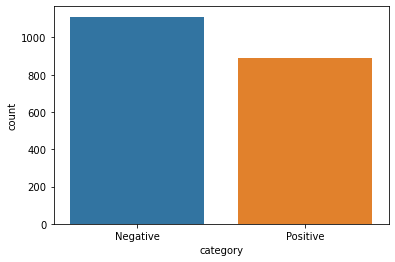

In [27]:
import seaborn as sns
sns.countplot(x = 'category', data=df)

In [28]:
df.category.value_counts(normalize=True).mul(100)

Negative    55.577789
Positive    44.422211
Name: category, dtype: float64